# **샘플 데이터와 Decision Tree Regressor**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

# **1. Data**

1.1 Data Load

예시에서 사용할 샘플 데이터를 생성합니다.

In [3]:
data = np.sort(np.random.uniform(low=0, high=5, size =(80, 1)))
label = np.sin(data).ravel()
label[::5] += 3 + (0.5 - np.random.uniform(0,1,16))

데이터는 하나의 변수를 가지며 변수에 따른 정답은 아래처럼 생겼습니다.

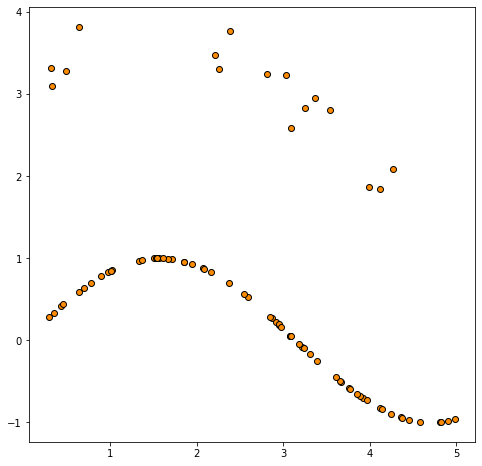

In [4]:
plt.figure(figsize = (8,8))
plt.scatter(data, label, edgecolor = "black", c = "darkorange")


# 1.2 Viz Data

시각화를 위한 데이터도 생성합니다.

In [6]:
viz_test_data = np.arange(0.0, 5.0, 0.01)[:,np.newaxis]

In [7]:
viz_test_data[:5]

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04]])

# 2. Decision Tree Regressor

Tree의 분할이 이루어질 때마다 어떻게 예측을 하는지 알아보겠습니다.

In [11]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

2.1 분할이 없을 경우

분할이 없는 경우에는 학습 데이터의 평균으로 예측을 합니다.

In [16]:
viz_test_pred = np.repeat(label.mean(), len(viz_test_data))

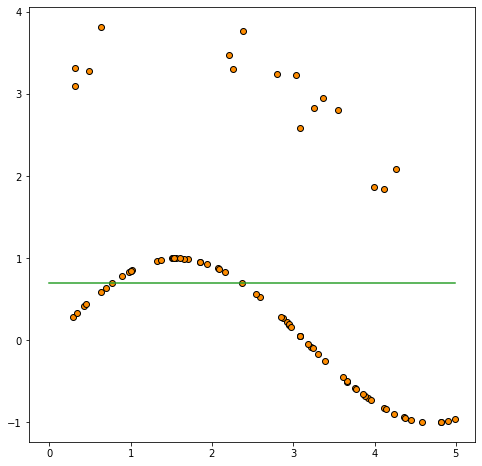

In [17]:
# Plot으로 보면 강의에서 본 하나의 선이 생깁니다.

plt.figure(figsize = (8,8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.plot(viz_test_data, viz_test_pred, color = "C2")

분할이없을때의 mse variance를 계산하면 다읍과 같습니다.

In [20]:
train_pred = np.repeat(label.mean(), len(data))
mse_var = np.var(label - train_pred)

In [21]:
print(f"no divide mse variance: {mse_var:.3f}")

no divide mse variance: 1.757


# 2.2 첫 번째 분할

In [22]:
first_divide = DecisionTreeRegressor(max_depth=1)

In [23]:
first_divide.fit(data, label)

DecisionTreeRegressor(max_depth=1)

In [26]:
first_divide_pred = first_divide.predict(viz_test_data)

In [29]:
first_divide.tree_.threshold

array([ 3.57584155, -2.        , -2.        ])

첫번째로 분할되서 나누어진 영역을 그리면 아래와 같습니다.

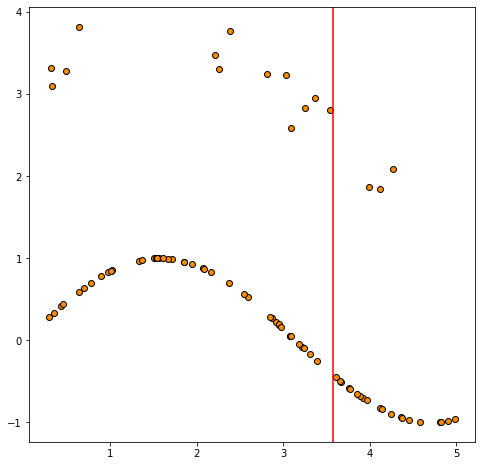

In [28]:
plt.figure(figsize = (8,8))
plt.scatter(data, label, edgecolor = "black", c="darkorange")
plt.axvline(first_divide.tree_.threshold[0], color = 'red')

분할이 이루어진 각 영역에서 다시 평균을 계산합니다.

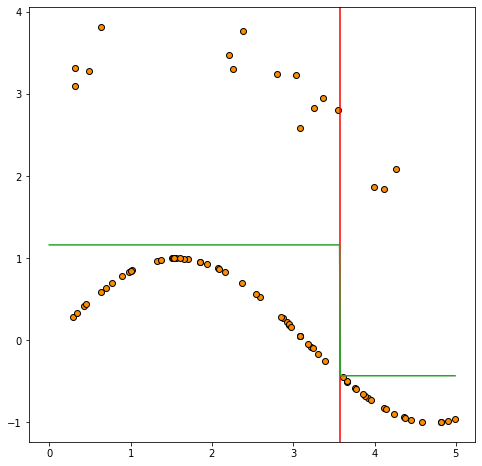

In [31]:
plt.figure(figsize=(8,8))
plt.scatter(data, label, edgecolor = "black", c = "darkorange")
plt.axvline(first_divide.tree_.threshold[0], color = "red")
plt.plot(viz_test_data, first_divide_pred, color = "C2")

[Text(0.5, 0.75, 'X[0] <= 3.576\nsquared_error = 1.757\nsamples = 80\nvalue = 0.705'),
 Text(0.25, 0.25, 'squared_error = 1.384\nsamples = 57\nvalue = 1.163'),
 Text(0.75, 0.25, 'squared_error = 0.871\nsamples = 23\nvalue = -0.431')]

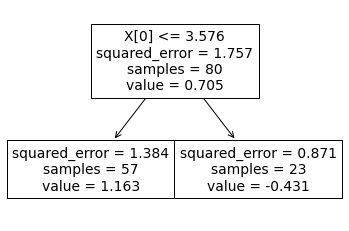

In [32]:
plot_tree(first_divide)

# 2.3 두 번째 분할

In [36]:
second_divide = DecisionTreeRegressor(max_depth=2)

In [37]:
second_divide.fit(data, label)

DecisionTreeRegressor(max_depth=2)

In [39]:
second_divide_pred = second_divide.predict(viz_test_data)

In [42]:
second_divide.tree_.threshold

array([ 3.57584155,  2.82644379, -2.        , -2.        ,  4.31213784,
       -2.        , -2.        ])

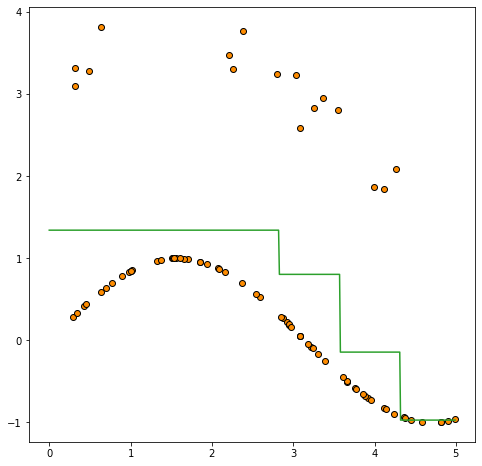

In [43]:
plt.figure(figsize=(8,8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.plot(viz_test_data, second_divide_pred, color="C2")

[Text(0.5, 0.8333333333333334, 'X[0] <= 3.576\nsquared_error = 1.757\nsamples = 80\nvalue = 0.705'),
 Text(0.25, 0.5, 'X[0] <= 2.826\nsquared_error = 1.384\nsamples = 57\nvalue = 1.163'),
 Text(0.125, 0.16666666666666666, 'squared_error = 1.193\nsamples = 38\nvalue = 1.343'),
 Text(0.375, 0.16666666666666666, 'squared_error = 1.573\nsamples = 19\nvalue = 0.804'),
 Text(0.75, 0.5, 'X[0] <= 4.312\nsquared_error = 0.871\nsamples = 23\nvalue = -0.431'),
 Text(0.625, 0.16666666666666666, 'squared_error = 1.096\nsamples = 15\nvalue = -0.143'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 8\nvalue = -0.971')]

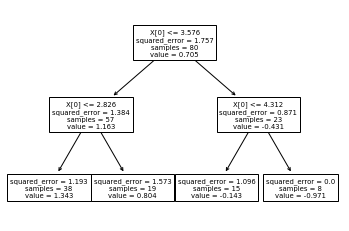

In [44]:
plot_tree(second_divide)

# 3. Depth에 따른 변환

In [45]:
shallow_depth_tree = DecisionTreeRegressor(max_depth =2)
deep_depth_tree = DecisionTreeRegressor(max_depth=5)

In [46]:
shallow_depth_tree.fit(data, label)
deep_depth_tree.fit(data, label)

DecisionTreeRegressor(max_depth=5)

In [47]:
shallow_pred = shallow_depth_tree.predict(viz_test_data)
deep_pred = deep_depth_tree.predict(viz_test_data)

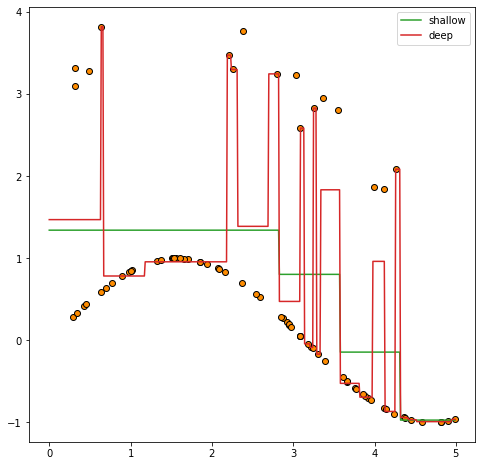

In [49]:
plt.figure(figsize = (8,8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.plot(viz_test_data, shallow_pred, color = "C2", label = "shallow")
plt.plot(viz_test_data, deep_pred, color="C3", label="deep")
plt.legend()

Decision Tree는 이상치 데이터에 영향을 많이 받는걸 알수 있음!